In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data.csv")

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df = df.drop("Date",axis =1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           113036 non-null  int

In [6]:
df.isnull().sum()

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
df["Age_Group"].unique()


array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [8]:

df["Age_Group"] = df["Age_Group"].replace({
    "Youth (<25)":"Youth",
    "Adults (35-64)":"Adults",
    "Young Adults (25-34)":"Young Adults",
    "Seniors (64+)":"Senior"
})

In [9]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26,November,2015,19,Youth,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23,March,2014,49,Adults,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23,March,2016,49,Adults,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15,May,2014,47,Adults,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


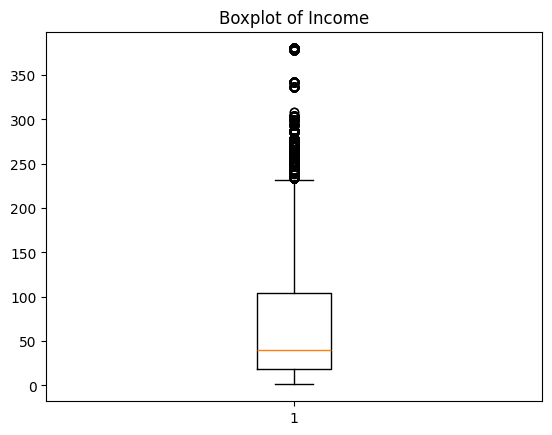

In [11]:
plt.boxplot(df["Cost"])
plt.title("Boxplot of Income")
plt.show()

In [10]:
num_cols = ["Unit_Cost", "Cost", "Unit_Price", "Revenue"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [14]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1048,4,January,2014,53,Adults,M,Australia,Victoria,Accessories,Bottles And Cages,Mountain Bottle Cage,3,4,10,12,12,24
1049,4,January,2014,53,Adults,M,Australia,Victoria,Accessories,Bottles And Cages,Mountain Bottle Cage,15,4,10,59,60,119
1050,4,January,2016,53,Adults,M,Australia,Victoria,Accessories,Bottles And Cages,Mountain Bottle Cage,3,4,10,12,12,24
1051,4,January,2016,53,Adults,M,Australia,Victoria,Accessories,Bottles And Cages,Mountain Bottle Cage,13,4,10,51,52,103
1052,26,April,2014,53,Adults,M,Australia,Victoria,Accessories,Bottles And Cages,Mountain Bottle Cage,8,4,10,31,32,63


In [13]:
# Text columns to clean
text_cols = [
    "Age_Group", "Customer_Gender", "Country", "State",
    "Product_Category", "Sub_Category", "Product"
]

# Standardize text: strip spaces + lowercase + title case
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().str.title()


In [15]:
df.to_csv("final_sales+data.csv", index=False)